### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [1]:
import warnings
warnings.filterwarnings('ignore')

#### 1. Import the necessary packages - 2.5 marks

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
%matplotlib inline

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
df_data = pd.read_csv(r'Data.csv')
df_item = pd.read_csv(r'item.csv')
df_user = pd.read_csv(r'user.csv')

In [4]:
#Get the first five rows to look at the data set sample of df_data dataframe
df_data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
#Get the first five rows to look at the data set sample of df_item dataframe
df_item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [6]:
#Get the first five rows to look at the data set sample of df_user dataframe
df_user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

### Applying  info, shape, describe for the df_data dataframe

In [7]:
#Info
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [8]:
#Shape to find out number of fields and rows in the df_data datasets 
df_data.shape

(100000, 4)

In [9]:
#Describe to find out the five points of df_data datasets 
df_data.describe()


,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [10]:
#Check if the dataframe contains duplicate row based on all the column
df_data_dup = df_data[df_data.duplicated()]
df_data_dup.shape

(0, 4)

In [11]:
#Check if the dataframe contains duplicate row based "user id" and "movie id" column
df_data_dup_usr = df_data[df_data.duplicated(['user id','movie id'])]
df_data_dup_usr.shape

(0, 4)

#### <span style="color:red"> Initial Observation with respect df_data dataframe </span>

1. User ID and Movie ID are the ID's which should be overlooked while looking at the points 


2. Rating filed is less skewed when looking at the below observation
    * 3rd quartile and maximum
    * the standard deviation
    
    
3. None of the fields having null value 

### Applying  info, shape, describe for the df_item dataframe

In [12]:
#Info
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
movie id        1681 non-null int64
movie title     1681 non-null object
release date    1681 non-null object
unknown         1681 non-null int64
Action          1681 non-null int64
Adventure       1681 non-null int64
Animation       1681 non-null int64
Childrens       1681 non-null int64
Comedy          1681 non-null int64
Crime           1681 non-null int64
Documentary     1681 non-null int64
Drama           1681 non-null int64
Fantasy         1681 non-null int64
Film-Noir       1681 non-null int64
Horror          1681 non-null int64
Musical         1681 non-null int64
Mystery         1681 non-null int64
Romance         1681 non-null int64
Sci-Fi          1681 non-null int64
Thriller        1681 non-null int64
War             1681 non-null int64
Western         1681 non-null int64
dtypes: int64(20), object(2)
memory usage: 289.0+ KB


In [13]:
#Shape to find out number of fields and rows in the df_item datasets 
df_item.shape

(1681, 22)

In [14]:
#Describe to find out the five points of df_item datasets 
df_item.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
#Check if the dataframe contains duplicate row based on all the column
df_item_dup = df_item[df_item.duplicated()]
df_item_dup.shape

(0, 22)

In [16]:
#Check if the dataframe contains duplicate row based on the "movie id"
df_item_dup_movie = df_item[df_item.duplicated(['movie id'])]
df_item_dup_movie.shape

(0, 22)

#### <span style="color:red"> Initial Observation with respect df_item dataframe </span>



1. Movie ID is the ID's which should be overlooked while looking at the points 


2. Fields like the movie genere, refleecting whether movie is in that genere or not, It is just like categorical data converted into dummies data.
    
    
3. None of the fields having null value


### Applying  info, shape, describe for the df_user dataframe

In [17]:
#Info
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


In [18]:
#Shape to find out number of fields and rows in the df_user datasets 
df_user.shape

(943, 5)

In [19]:
#Describe to find out the five points of df_user datasets 
df_user.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [20]:
#Check if the dataframe contains duplicate row based on all the column
df_user_dup = df_user[df_user.duplicated()]
df_user_dup.shape

(0, 5)

In [21]:
#Check if the dataframe contains duplicate row based "user id" column
df_user_dup_usr = df_user[df_user.duplicated(['user id'])]
df_user_dup_usr.shape

(0, 5)

#### 4. Find the number of movies per genre using the item data - 2.5 marks

#### <span style="color:red"> Following are the steps which are followed in order to find the number of movies per genre</span> 

    1. Create an empty movie_sum_cat dictionary 
    2. Iterate through the df_item dataframe columns starting "unknown" till "western" 
    3. Summation of column value for each field where value is equal to 1
    4. Append the key and value into the empty dictionary
    5. After iteration convert the dictionary into a dataframe where the column name is "Genere_Movie_Sum" 
    6. Sort values by Genere_Movie_Sum in ascending order

In [22]:
# use sum on the default axis
movie_sum_cat = {}
for ind in df_item.loc[:,'unknown':'Western'].columns.values:
    movie_sum = 0
    movie_sum = df_item[ind][df_item[ind] == 1].sum()
    movie_sum_cat[ind] = movie_sum
    
    #print(ind,"=",movie_sum)

Genere_Movie_Sum = pd.DataFrame.from_dict(movie_sum_cat,orient='index',columns=['Genere_Movie_Sum']).reset_index()
Genere_Movie_Sum.rename(columns={'index':'Movie_Name'},inplace = True)
Genere_Movie_Sum.sort_values('Genere_Movie_Sum').reset_index().drop('index',axis=1)

,Movie_Name,Genere_Movie_Sum
0,unknown,1
1,Fantasy,22
2,Film-Noir,24
3,Western,27
4,Animation,42
5,Documentary,50
6,Musical,56
7,Mystery,61
8,War,71
9,Horror,92


#### 5. Find the movies that have more than one genre - 5 marks

### <span style="color:red"> Following are the steps followed to find out movie having more than 1 genre </span>

    1. Create an empty dataframe df_item_movie_sum
    2. Create a field namely 'genere_sum' to hold what is sum total of genere
    3. List down the movie title along with genre sum where genre sum is greater than 1

In [23]:
#hint: use sum on the axis = 1
df_item_movie_sum = pd.DataFrame()
df_item_movie_sum['genere_sum'] = df_item.loc[:,'unknown':'Western'].sum(axis = 1,skipna = True)
df_item_movie = df_item_movie_sum.join(df_item[['movie title']])
df_item_movie[df_item_movie['genere_sum'] > 1 ]

,genere_sum,movie title
0,3,Toy Story
1,3,GoldenEye
3,3,Get Shorty
4,3,Copycat
6,2,Twelve Monkeys
7,3,Babe
9,2,Richard III
10,2,Seven (Se7en)
11,2,"Usual Suspects, The"
13,2,"Postino, Il"


#### 6. Drop the movie where the genre is unknown - 2.5 marks

### <span style="color:red"> Following are the steps followed to find out and drop movies where genre is unkown </span>

    1. Create a copy of the dataframe so as to not impact the original dataframe
    2. Dataframe having list of indexes where genre is unknown
    3. Using the dataframe havig indexes where genre is unknown, drop those index value
    4. Reset the dataframe so as to order the index once again

In [24]:
df_item_wt_unkwn = df_item.copy()
df_index = df_item_wt_unkwn[df_item_wt_unkwn['unknown'] == 1].index
df_item_wt_unkwn.drop(df_index,axis = 0,inplace = True )
df_item_wt_unkwn.reset_index(inplace=True)

In [25]:
# Check if there are any movie with unknow genere
df_item_wt_unkwn[df_item_wt_unkwn['unknown'] == 1]

,index,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [26]:
# HINT: use distplot for age and countplot for gender,ratings,occupation, release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.

### <span style="color:red"> Following are the steps followed to find out release year </span>
1. Convert data type of release date from object to datetime 
2. Use pandas DateTimeIndex to find extract release year from release date

In [27]:
#Find out what is the data type of the release date
df_item[['release date']].dtypes

release date    object
dtype: object

In [28]:
df_item['release year'] = pd.DatetimeIndex(df_item['release date'].astype('datetime64[ns]')).year
df_item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995


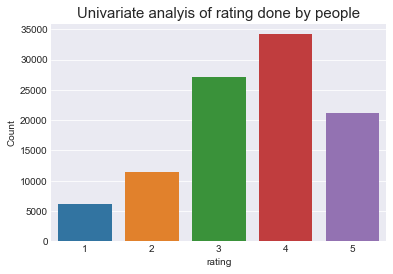

In [29]:
ax_cnt = sns.countplot(df_data['rating']);
ax_cnt.set_ylabel('Count',fontsize = 10)
ax_cnt.set_title('Univariate analyis of rating done by people',fontsize = 15);

C:\Users\supriya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


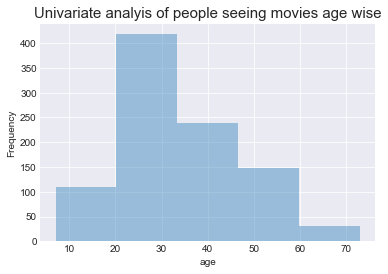

In [30]:
ax_dist = sns.distplot(df_user['age'],bins = 5,kde=False);
ax_dist.set_ylabel('Frequency',fontsize = 10)
ax_dist.set_title('Univariate analyis of people seeing movies age wise',fontsize = 15);

### <span style="color:red"> For Univariate plotting of the release year </span>
1. Use pandas plot function with horizontal plot adjusting the figure size 
2. Changing the font size of the X-ticks and Y-ticks


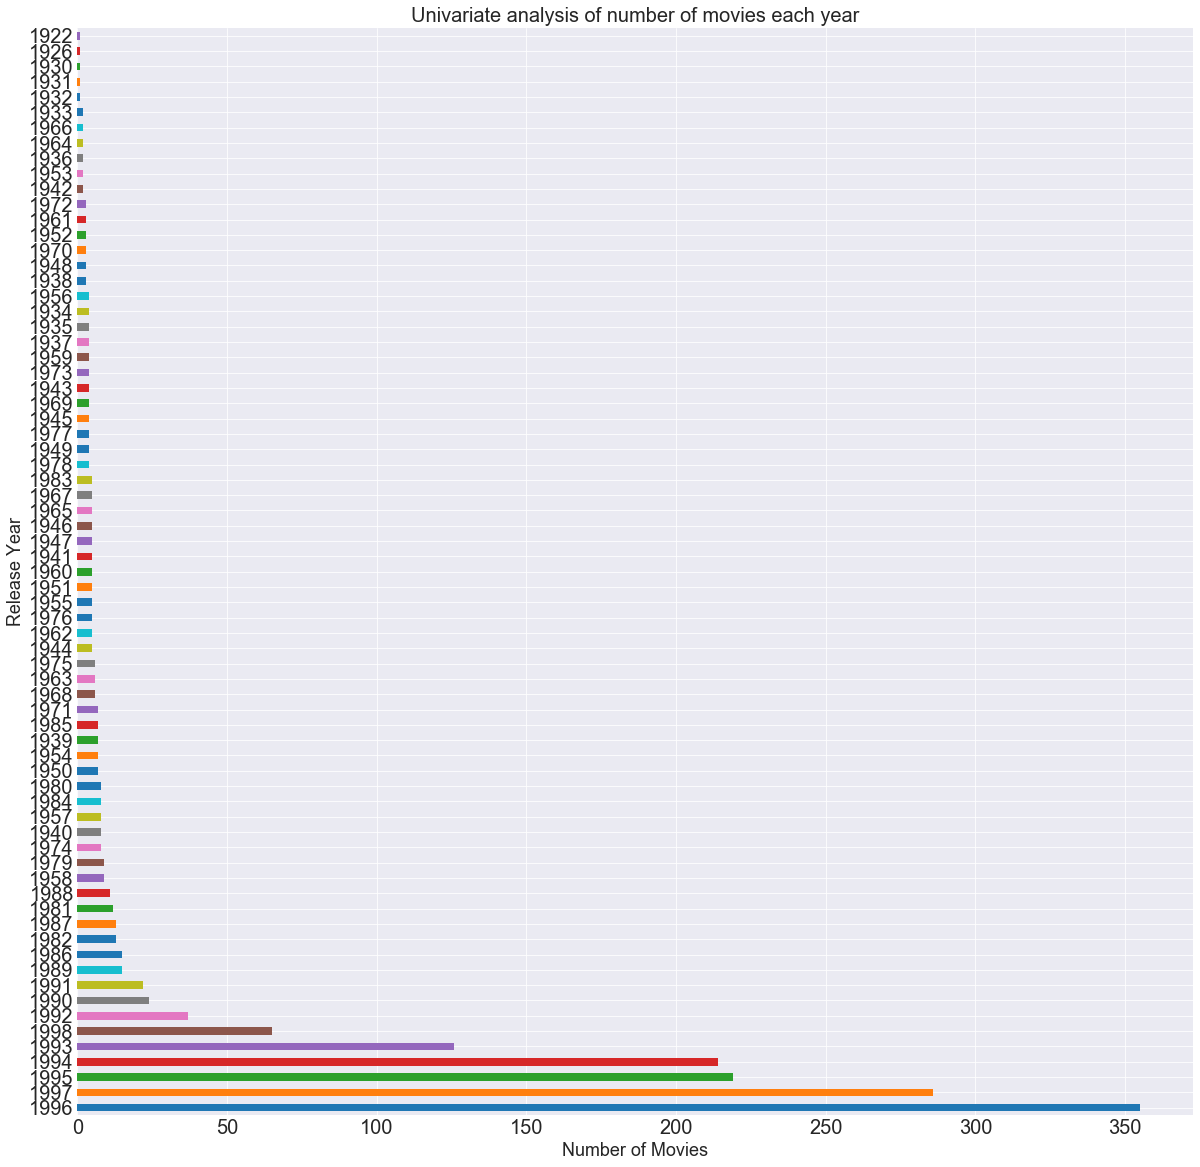

In [31]:
df_item['release year'].value_counts().plot(kind='barh',figsize = (20,20));
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.ylabel('Release Year', fontsize=18)
plt.xlabel('Number of Movies',fontsize=18)
plt.title('Univariate analysis of number of movies each year',fontsize=20);

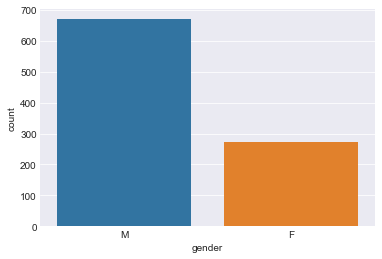

In [32]:
sns.countplot(df_user['gender']);

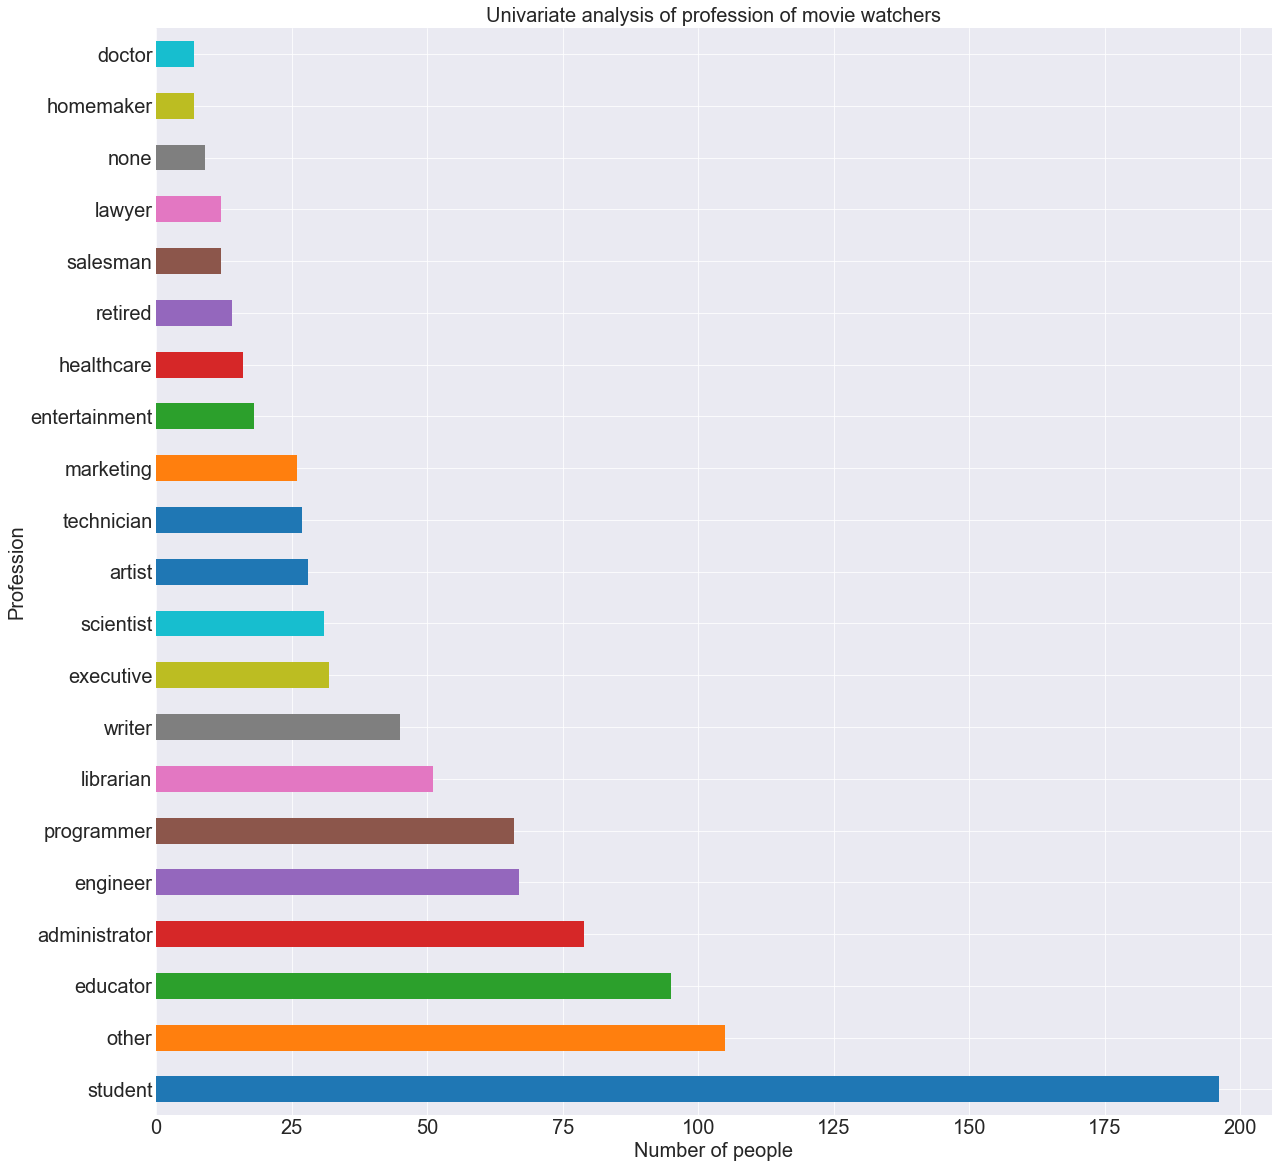

In [33]:
df_user['occupation'].value_counts().plot(kind='barh',figsize = (20,20));
plt.xlabel("Number of people",fontsize = 20)
plt.ylabel("Profession",fontsize = 20)
plt.title("Univariate analysis of profession of movie watchers",fontsize = 20)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [34]:
#Your answer here
df_item_gen_pop = df_item.loc[:,'unknown':'release year'].groupby('release year').sum()
df_item_gen_pop.head()

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


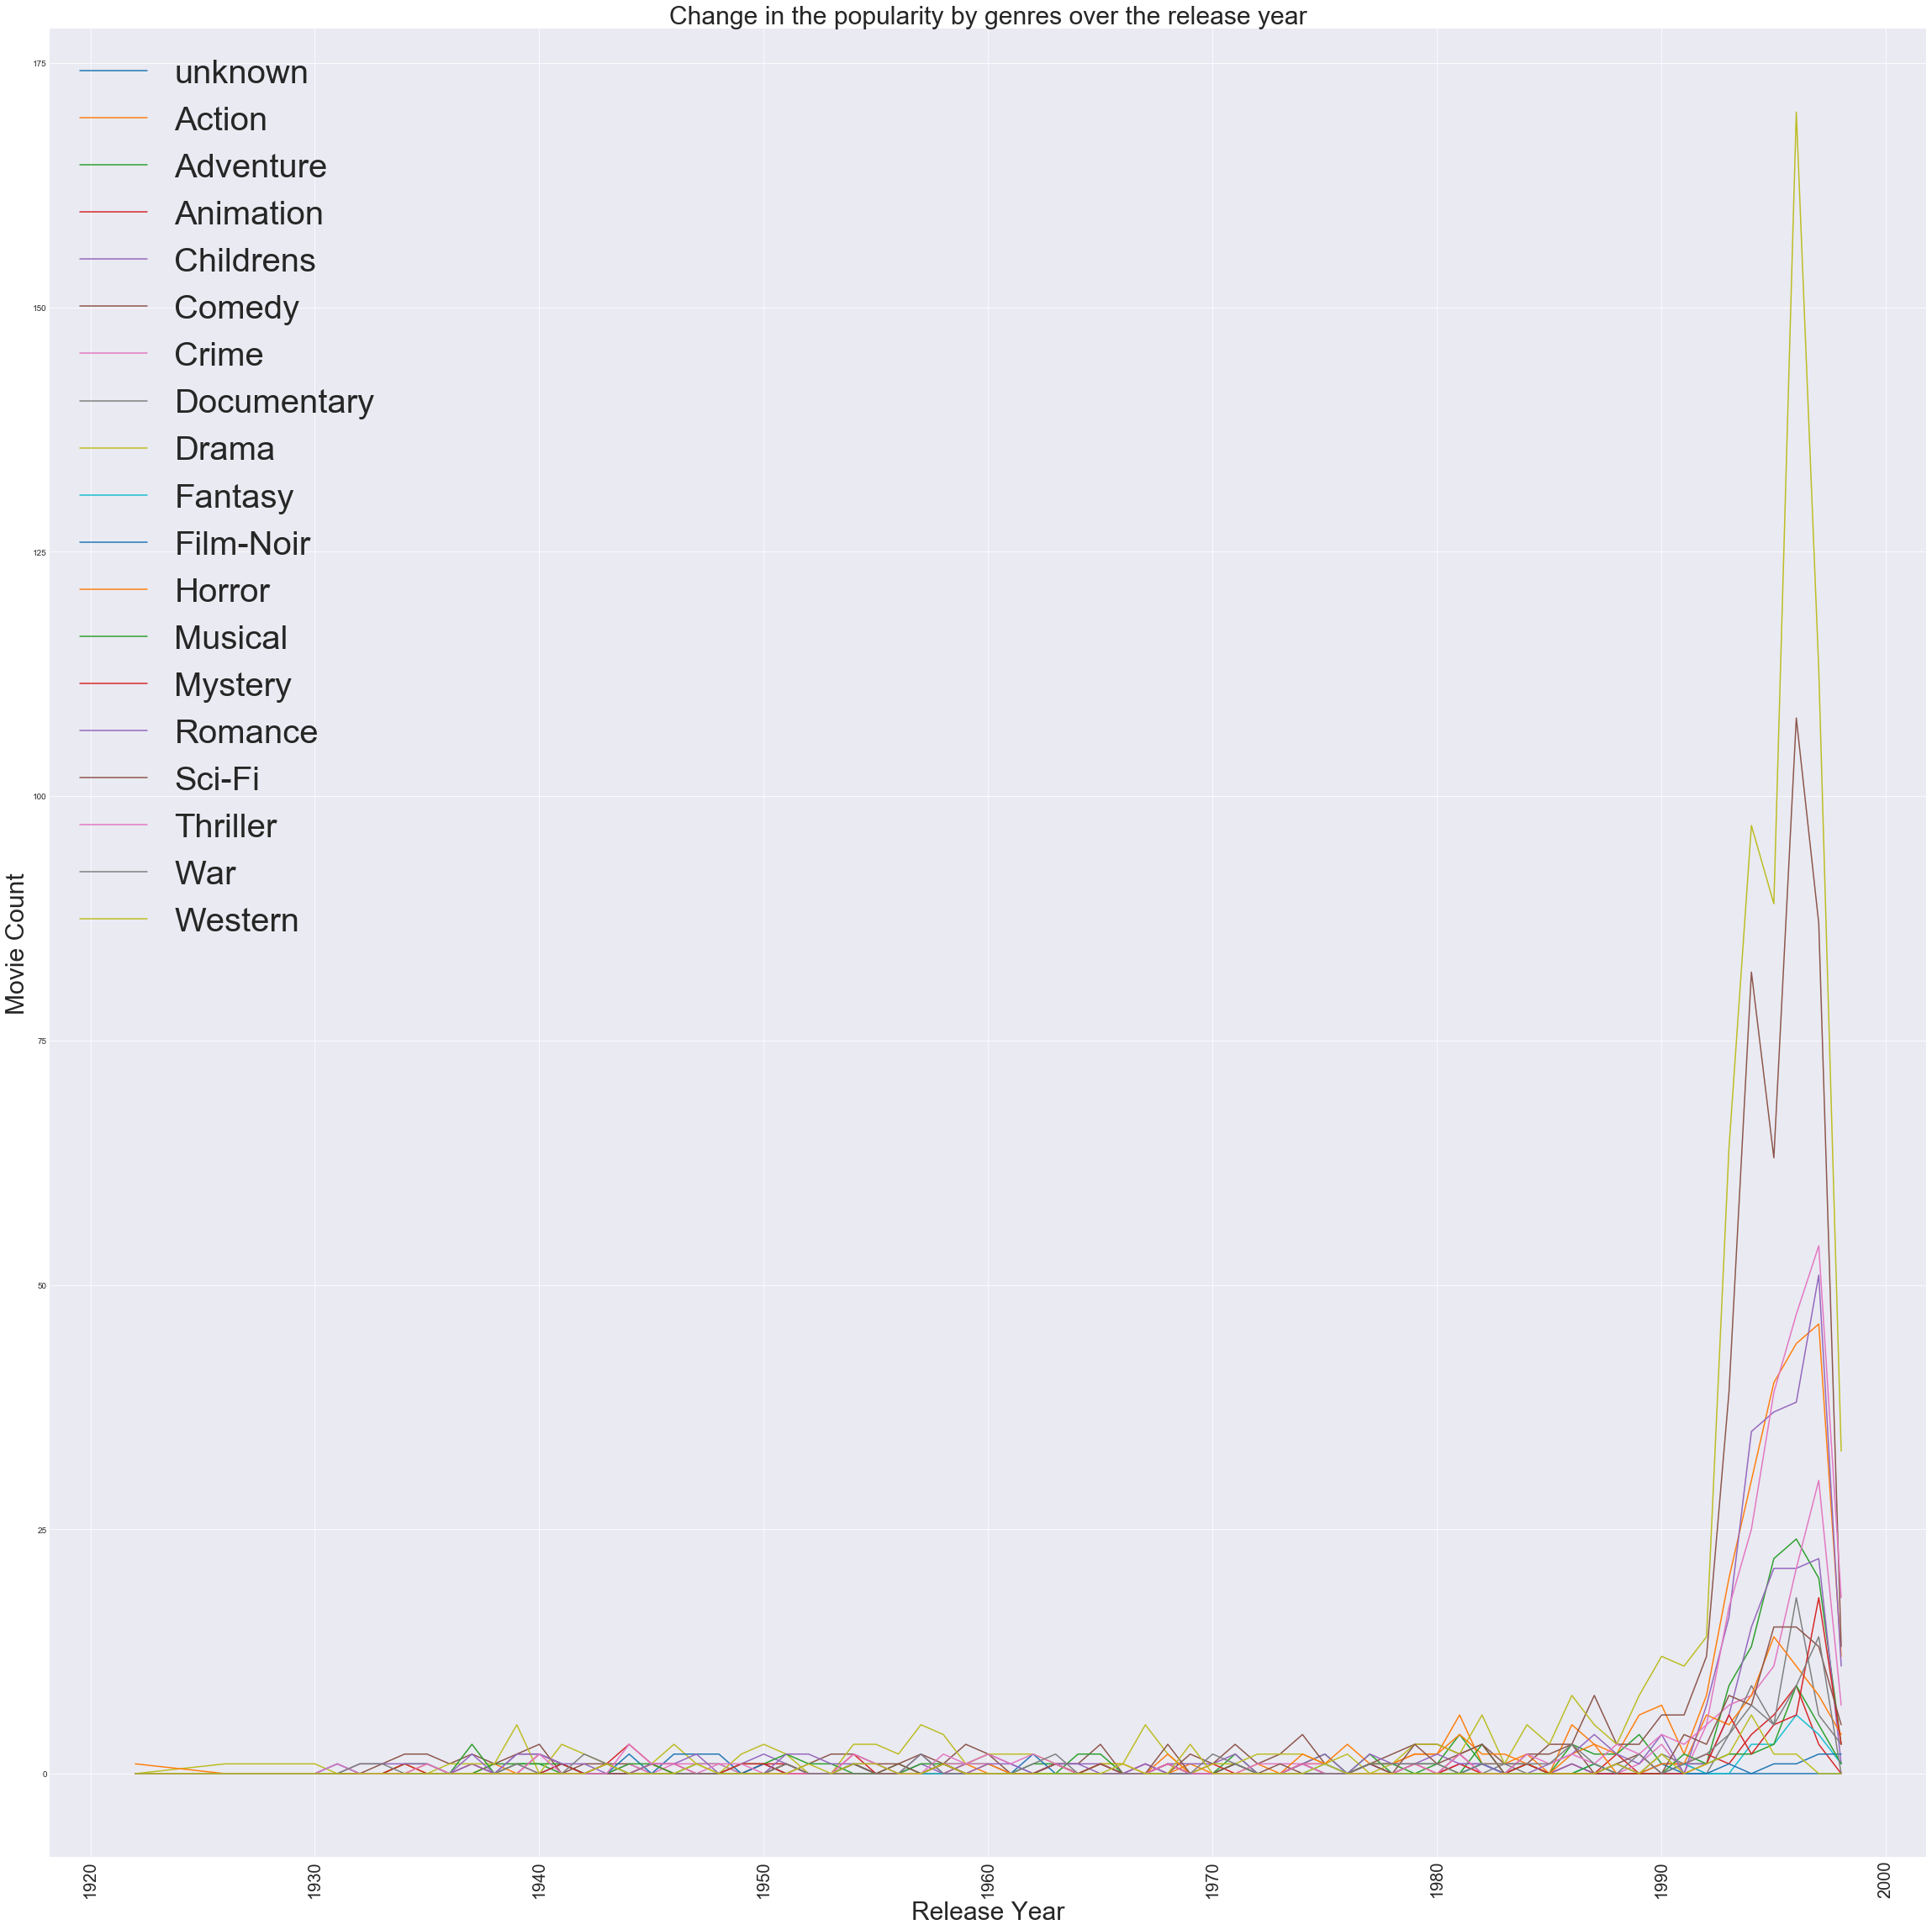

In [35]:
plt.figure(figsize=(40,40))
for indx in df_item_gen_pop.columns.values:
    plt.plot(df_item_gen_pop.index,df_item_gen_pop[indx],label=indx);
    #sns.lineplot(df_item_gen_pop.index,df_item_gen_pop[indx])

plt.legend(loc="upper left",fontsize = 40);
plt.xlabel('Release Year', fontsize=30);
plt.ylabel('Movie Count', fontsize=30);
plt.xticks(fontsize=20, rotation=90);
plt.title('Change in the popularity by genres over the release year',fontsize=30);

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the ids and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

### <span style="color:red"> Following are the steps followed to arrive at the result </span>
1. Get the total rating for each movie using group by movie id and sum over the rating. 
2. Insert the result into a dataframe df_data_sum. Sum of the rating into field name "agg_rating"
3. Get the averge rating for each movie using group by movie id and mean over the rating
4. Insert the result into a dataframe df_data_avg. Sum of the rating into field name "avg_rating"
5. Merge the dataframe df_data_sum and df_data_avg on "movie id" and insert the result into dataframe df_data_sum_avg
6. Merge the dataframe df_data_sum_avg with df_item on "movie id" and insert the result into dataframe "result"
7. Create a dataframe where the "agg_rating" is greater than 100 sorting over "avg_rating" in decending order
8. Get the first 25 rows fulfilling the requirement "Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100"

In [36]:
#your answer here
df_data_sum = pd.DataFrame(df_data.loc[:,['movie id','rating']].groupby('movie id').sum(axis = 1,skipna = True))
df_data_sum.reset_index(inplace=True)
df_data_sum.rename(columns={'rating':'agg_rating'},inplace=True)

df_data_avg = pd.DataFrame(df_data.groupby('movie id')['rating'].mean())
df_data_avg.reset_index(inplace=True)
df_data_avg.rename(columns={'rating':'avg_rating'},inplace=True)

df_data_sum_avg = pd.merge(df_data_sum,df_data_avg,how='inner',on='movie id')

result = pd.merge(df_item,df_data_sum_avg,how='inner',on='movie id')
result_top = result[ result['agg_rating'] > 100 ].sort_values('avg_rating',ascending=False)
result_top.reset_index(inplace=True,drop=True)
result_top.loc[:,['movie id','movie title','release date','agg_rating','avg_rating']].head(25)



,movie id,movie title,release date,agg_rating,avg_rating
0,408,"Close Shave, A",28-Apr-1996,503,4.491071
1,318,Schindler's List,01-Jan-1993,1331,4.466443
2,169,"Wrong Trousers, The",01-Jan-1993,527,4.466102
3,483,Casablanca,01-Jan-1942,1083,4.456790
4,114,Wallace & Gromit: The Best of Aardman Animation,05-Apr-1996,298,4.447761
5,64,"Shawshank Redemption, The",01-Jan-1994,1258,4.445230
6,603,Rear Window,01-Jan-1954,917,4.387560
7,12,"Usual Suspects, The",14-Aug-1995,1171,4.385768
8,50,Star Wars,01-Jan-1977,2541,4.358491
9,178,12 Angry Men,01-Jan-1957,543,4.344000


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [37]:
result1 = pd.merge(df_user,df_data,how='inner',on='user id')
df_dr_sc_Ro = df_item[( df_item['Drama']  == 1 ) | ( df_item['Sci-Fi'] == 1 ) | ( df_item['Romance'] == 1 ) ]
df_dr_sc_Ro = df_dr_sc_Ro.loc[:,['movie id','movie title','Drama','Sci-Fi','Romance']].reset_index(drop=True)
df_dr_sc_Ro.head()
result2 = pd.merge(result1,df_dr_sc_Ro,how='inner',on='movie id')
result2.loc[:,['gender','Drama','Sci-Fi','Romance']].groupby('gender').sum()

,Drama,Sci-Fi,Romance
gender,,,
F,11008,2629,5858
M,28887,10101,13603


In [38]:
result2[result2['Drama'] == 1].loc[:,['gender','rating']].groupby('gender').sum()

,rating
gender,
F,40314
M,106794


In [39]:
result2[result2['Sci-Fi'] == 1].loc[:,['gender','rating']].groupby('gender').sum()

,rating
gender,
F,9196
M,36132


In [40]:
result2[result2['Romance'] == 1].loc[:,['gender','rating']].groupby('gender').sum()

,rating
gender,
F,21415
M,49067


#### <span style="color:red"> Outcome result</span> 

|Description                       | Statement |
|----------------------------------|------------
|Men watch more drama than women   | True      |
|Women watch more Sci-Fi than men  | False     |
|Men watch more Romance than women | True      |

#### Conclusion:



## Analysis Conclusion
1. Year on year movie production has increased 
2. Male watches more movies as compared to female
3. Student watches movies most among all proessions 
4. Popularity of the Drama movies has increased most over year followed by children movies